# Adstock Demonstration - Visual Guide

**Goal**: Show exactly how adstock transformation works with concrete examples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("🎯 ADSTOCK DEMONSTRATION")
print("=" * 50)
print("📊 Visual Guide to Media Carryover Effects")

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 10)

🎯 ADSTOCK DEMONSTRATION
📊 Visual Guide to Media Carryover Effects


In [2]:
# Step 1: Define Adstock Function (Same as Enhanced MMM)
def apply_adstock(x, decay_rate=0.5):
    """Apply simple adstock transformation"""
    adstocked = np.zeros_like(x)
    adstocked[0] = x[0]
    for i in range(1, len(x)):
        adstocked[i] = x[i] + decay_rate * adstocked[i-1]
    return adstocked

print("🔧 ADSTOCK FUNCTION DEFINED")
print(f"   Formula: adstocked[t] = spend[t] + decay_rate × adstocked[t-1]")

🔧 ADSTOCK FUNCTION DEFINED
   Formula: adstocked[t] = spend[t] + decay_rate × adstocked[t-1]


In [3]:
# Step 2: Create Example Scenarios
print(f"\n📊 CREATING EXAMPLE SCENARIOS")

# Scenario 1: Single Big Spend
weeks = 12
scenario1_spend = np.zeros(weeks)
scenario1_spend[2] = 10000  # Big spend in week 3

# Scenario 2: Regular Weekly Spend  
scenario2_spend = np.array([5000, 5000, 5000, 0, 0, 0, 5000, 5000, 5000, 0, 0, 0])

# Scenario 3: Burst Campaign
scenario3_spend = np.array([0, 0, 8000, 8000, 8000, 0, 0, 0, 0, 0, 0, 0])

scenarios = {
    'Single Big Spend': scenario1_spend,
    'Regular Weekly': scenario2_spend, 
    'Burst Campaign': scenario3_spend
}

print(f"✅ Created 3 spending scenarios over {weeks} weeks")


📊 CREATING EXAMPLE SCENARIOS
✅ Created 3 spending scenarios over 12 weeks


In [4]:
# Step 3: Apply Different Decay Rates
decay_rates = [0.0, 0.3, 0.5, 0.7, 0.9]

print(f"\n🔄 TESTING DIFFERENT DECAY RATES")
print(f"   Decay rates: {decay_rates}")
print(f"   0.0 = No carryover (basic model)")
print(f"   0.9 = Very long carryover")


🔄 TESTING DIFFERENT DECAY RATES
   Decay rates: [0.0, 0.3, 0.5, 0.7, 0.9]
   0.0 = No carryover (basic model)
   0.9 = Very long carryover


In [5]:
# Step 4: Detailed Example - Single Big Spend
print(f"\n📈 DETAILED EXAMPLE: Single Big Spend ($10,000 in Week 3)")
print("=" * 60)

example_spend = scenario1_spend.copy()
week_labels = [f"Week {i+1}" for i in range(weeks)]

print(f"Original Spend by Week:")
for i, (week, spend) in enumerate(zip(week_labels, example_spend)):
    print(f"   {week}: ${spend:,.0f}")

print(f"\nAdstock Transformation (decay_rate = 0.5):")
adstocked_example = apply_adstock(example_spend, decay_rate=0.5)

for i, (week, original, adstocked) in enumerate(zip(week_labels, example_spend, adstocked_example)):
    if i == 0:
        calculation = f"${original:,.0f} (original)"
    elif original > 0:
        calculation = f"${original:,.0f} + 0.5 × ${adstocked_example[i-1]:,.0f} = ${adstocked:,.0f}"
    else:
        calculation = f"$0 + 0.5 × ${adstocked_example[i-1]:,.0f} = ${adstocked:,.0f}"
    
    print(f"   {week}: {calculation}")


📈 DETAILED EXAMPLE: Single Big Spend ($10,000 in Week 3)
Original Spend by Week:
   Week 1: $0
   Week 2: $0
   Week 3: $10,000
   Week 4: $0
   Week 5: $0
   Week 6: $0
   Week 7: $0
   Week 8: $0
   Week 9: $0
   Week 10: $0
   Week 11: $0
   Week 12: $0

Adstock Transformation (decay_rate = 0.5):
   Week 1: $0 (original)
   Week 2: $0 + 0.5 × $0 = $0
   Week 3: $10,000 + 0.5 × $0 = $10,000
   Week 4: $0 + 0.5 × $10,000 = $5,000
   Week 5: $0 + 0.5 × $5,000 = $2,500
   Week 6: $0 + 0.5 × $2,500 = $1,250
   Week 7: $0 + 0.5 × $1,250 = $625
   Week 8: $0 + 0.5 × $625 = $312
   Week 9: $0 + 0.5 × $312 = $156
   Week 10: $0 + 0.5 × $156 = $78
   Week 11: $0 + 0.5 × $78 = $39
   Week 12: $0 + 0.5 × $39 = $20


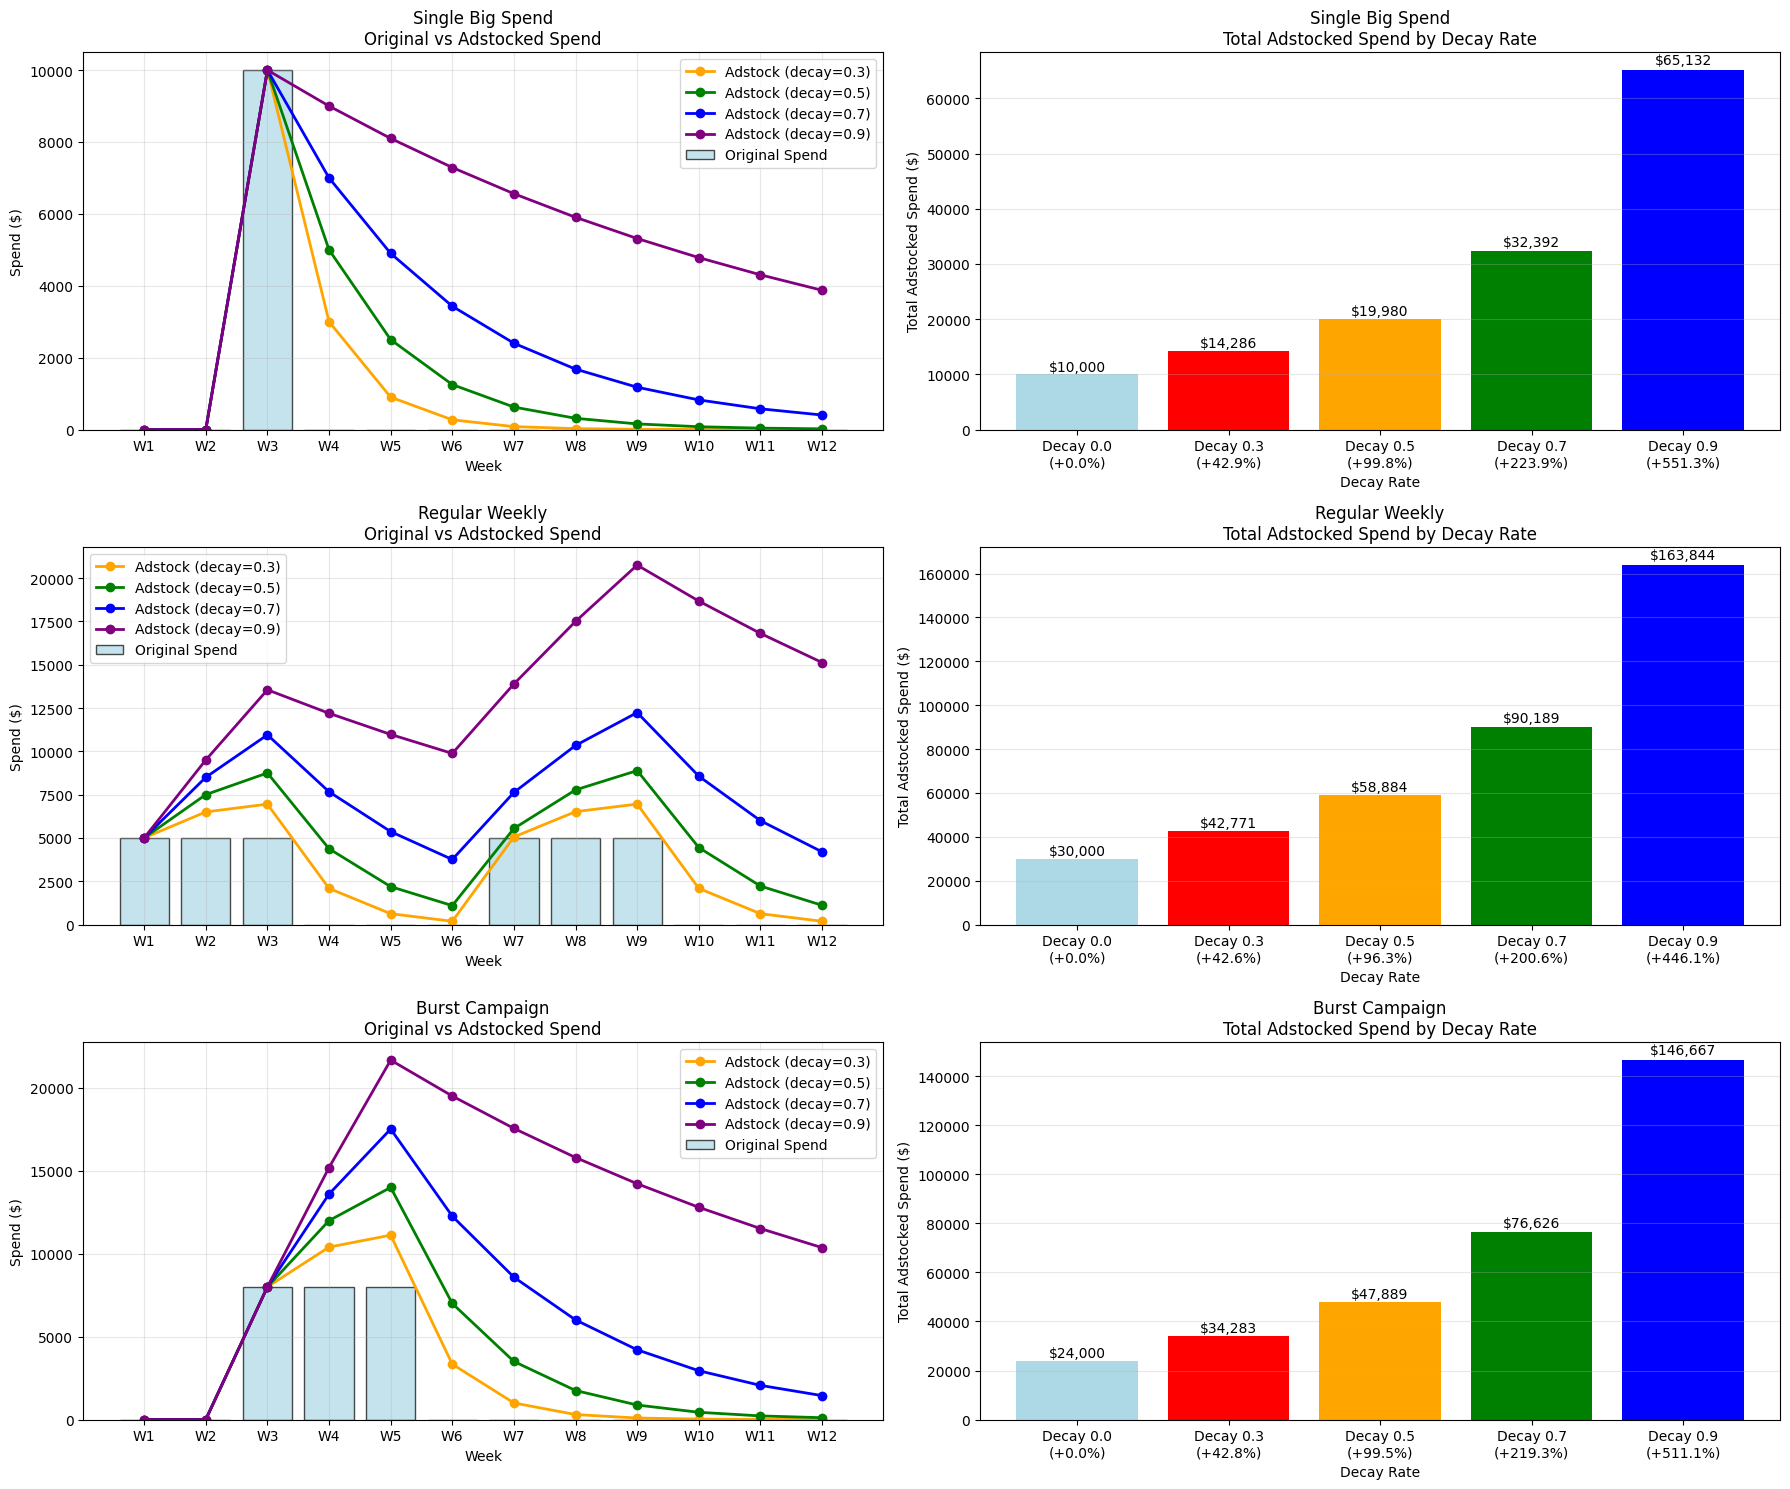

In [6]:
# Step 5: Create Comprehensive Visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Plot each scenario with different decay rates
for scenario_idx, (scenario_name, spend) in enumerate(scenarios.items()):
    ax = axes[scenario_idx, 0]
    
    # Plot original spend
    ax.bar(range(weeks), spend, alpha=0.7, color='lightblue', 
           label='Original Spend', edgecolor='black', linewidth=1)
    
    # Plot adstocked versions
    colors = ['red', 'orange', 'green', 'blue', 'purple']
    for i, decay_rate in enumerate(decay_rates):
        if decay_rate == 0.0:
            continue  # Skip 0.0 as it's same as original
        adstocked = apply_adstock(spend, decay_rate)
        ax.plot(range(weeks), adstocked, marker='o', linewidth=2, 
                color=colors[i], label=f'Adstock (decay={decay_rate})')
    
    ax.set_title(f'{scenario_name}\nOriginal vs Adstocked Spend')
    ax.set_xlabel('Week')
    ax.set_ylabel('Spend ($)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(weeks))
    ax.set_xticklabels([f'W{i+1}' for i in range(weeks)])

# Comparison plots
for scenario_idx, (scenario_name, spend) in enumerate(scenarios.items()):
    ax = axes[scenario_idx, 1]
    
    # Calculate total adstocked spend for each decay rate
    total_original = spend.sum()
    totals = []
    labels = []
    
    for decay_rate in decay_rates:
        adstocked = apply_adstock(spend, decay_rate)
        total_adstocked = adstocked.sum()
        increase = (total_adstocked - total_original) / total_original * 100
        
        totals.append(total_adstocked)
        labels.append(f'Decay {decay_rate}\n(+{increase:.1f}%)')
    
    bars = ax.bar(range(len(decay_rates)), totals, 
                  color=['lightblue', 'red', 'orange', 'green', 'blue'])
    
    # Add value labels
    for bar, total in zip(bars, totals):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'${total:,.0f}', ha='center', va='bottom')
    
    ax.set_title(f'{scenario_name}\nTotal Adstocked Spend by Decay Rate')
    ax.set_xlabel('Decay Rate')
    ax.set_ylabel('Total Adstocked Spend ($)')
    ax.set_xticks(range(len(decay_rates)))
    ax.set_xticklabels(labels)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [7]:
# Step 6: ROI Impact Analysis
print(f"\n💰 ROI IMPACT ANALYSIS")
print("=" * 40)

# Simulate sales response (for demonstration)
np.random.seed(42)
base_sales = 100000

print(f"🎯 Simulating Sales Response:")
print(f"   Base weekly sales: ${base_sales:,.0f}")
print(f"   Assumed media effectiveness: $2 sales per $1 adstocked spend")

for scenario_name, spend in scenarios.items():
    print(f"\n📊 {scenario_name.upper()}:")
    
    # Calculate ROI for different decay rates
    for decay_rate in [0.0, 0.5, 0.7]:
        adstocked = apply_adstock(spend, decay_rate)
        
        # Simulate sales (base + media effect + noise)
        media_effect = adstocked * 2  # $2 sales per $1 adstocked spend
        total_sales = base_sales + media_effect + np.random.normal(0, 5000, weeks)
        
        # Calculate ROI
        total_spend = spend.sum()
        total_media_sales = media_effect.sum()
        roi = total_media_sales / total_spend if total_spend > 0 else 0
        
        decay_label = "No Adstock" if decay_rate == 0.0 else f"Decay {decay_rate}"
        print(f"   {decay_label:12s}: ROI = ${roi:.2f} per $1 spent")


💰 ROI IMPACT ANALYSIS
🎯 Simulating Sales Response:
   Base weekly sales: $100,000
   Assumed media effectiveness: $2 sales per $1 adstocked spend

📊 SINGLE BIG SPEND:
   No Adstock  : ROI = $2.00 per $1 spent
   Decay 0.5   : ROI = $4.00 per $1 spent
   Decay 0.7   : ROI = $6.48 per $1 spent

📊 REGULAR WEEKLY:
   No Adstock  : ROI = $2.00 per $1 spent
   Decay 0.5   : ROI = $3.93 per $1 spent
   Decay 0.7   : ROI = $6.01 per $1 spent

📊 BURST CAMPAIGN:
   No Adstock  : ROI = $2.00 per $1 spent
   Decay 0.5   : ROI = $3.99 per $1 spent
   Decay 0.7   : ROI = $6.39 per $1 spent


In [8]:
# Step 7: Business Interpretation
print(f"\n💡 BUSINESS INTERPRETATION")
print("=" * 50)

print(f"🎯 KEY INSIGHTS:")

print(f"\n1. CARRYOVER EFFECT:")
print(f"   • Advertising impact doesn't stop when spending stops")
print(f"   • Effect decays gradually over time")
print(f"   • Higher decay rate = longer carryover")

print(f"\n2. TOTAL IMPACT CALCULATION:")
single_spend_original = scenarios['Single Big Spend'].sum()
single_spend_adstocked = apply_adstock(scenarios['Single Big Spend'], 0.5).sum()
increase = (single_spend_adstocked - single_spend_original) / single_spend_original * 100

print(f"   • Original spend: ${single_spend_original:,.0f}")
print(f"   • Adstocked total: ${single_spend_adstocked:,.0f}")
print(f"   • Increase: +{increase:.1f}% (captures carryover value)")

print(f"\n3. ROI ACCURACY:")
print(f"   • Without adstock: Underestimates media ROI")
print(f"   • With adstock: More accurate attribution")
print(f"   • Critical for budget allocation decisions")

print(f"\n4. CHANNEL DIFFERENCES:")
print(f"   • TV/Radio: Long carryover (decay ~0.7)")
print(f"   • Search: Short carryover (decay ~0.2)")
print(f"   • Social: Medium carryover (decay ~0.5)")

print(f"\n🚨 LIMITATIONS OF SIMPLE ADSTOCK:")
print(f"   • Same decay rate for all channels")
print(f"   • No saturation effects")
print(f"   • Linear relationship assumed")
print(f"   • No competitive effects")

print(f"\n🎉 ADSTOCK DEMONSTRATION COMPLETE!")
print(f"   ✅ Showed carryover effect calculation")
print(f"   ✅ Demonstrated impact on ROI")
print(f"   ✅ Explained business implications")
print(f"   Next: Implement in full MMM model")


💡 BUSINESS INTERPRETATION
🎯 KEY INSIGHTS:

1. CARRYOVER EFFECT:
   • Advertising impact doesn't stop when spending stops
   • Effect decays gradually over time
   • Higher decay rate = longer carryover

2. TOTAL IMPACT CALCULATION:
   • Original spend: $10,000
   • Adstocked total: $19,980
   • Increase: +99.8% (captures carryover value)

3. ROI ACCURACY:
   • Without adstock: Underestimates media ROI
   • With adstock: More accurate attribution
   • Critical for budget allocation decisions

4. CHANNEL DIFFERENCES:
   • TV/Radio: Long carryover (decay ~0.7)
   • Search: Short carryover (decay ~0.2)
   • Social: Medium carryover (decay ~0.5)

🚨 LIMITATIONS OF SIMPLE ADSTOCK:
   • Same decay rate for all channels
   • No saturation effects
   • Linear relationship assumed
   • No competitive effects

🎉 ADSTOCK DEMONSTRATION COMPLETE!
   ✅ Showed carryover effect calculation
   ✅ Demonstrated impact on ROI
   ✅ Explained business implications
   Next: Implement in full MMM model


## Summary: Why Adstock Matters

### **The Problem Without Adstock:**
- Model only sees immediate sales impact
- Underestimates media effectiveness
- Poor budget allocation decisions

### **The Solution With Adstock:**
- Captures carryover effects
- More accurate ROI calculation  
- Better media attribution

### **Real-World Impact:**
- TV campaign: Immediate + 4-6 weeks carryover
- Search ads: Immediate + 1-2 weeks carryover
- Brand campaigns: Immediate + 8-12 weeks carryover

**Adstock is essential for accurate Media Mix Modeling!** 📈 